<h2> Loading Amanzon Fine Food Reviews Data </h2>

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import nltk
import string
import seaborn
import re
import string as sns  # Tutorial about Python regular expressions: https://pymotw.com/2/re/
import pickle
import os

from sklearn.metrics import roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from collections import Counter 
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import MultinomialNB
from bs4 import BeautifulSoup
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter 
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
from tqdm import tqdm



<h2> Reading Data </h2>

In [31]:
naivebayes_ar = pd.read_csv('Reviews.csv', nrows=100000) #100K datapoint
naivebayes_ar.shape

(100000, 10)

In [32]:
def partition(x):
    if x < 3:
        return 0
    return 1

actualScore = naivebayes_ar['Score']
positiveNegative = actualScore.map(partition) 
naivebayes_ar['Score'] = positiveNegative
print("Number of data points in our data", naivebayes_ar.shape)

Number of data points in our data (100000, 10)


In [33]:
naivebayes_ar.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,1,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,0,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,1,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,0,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,1,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [34]:
#Sorting data according to ProductId in ascending order
sorted_data=naivebayes_ar.sort_values('ProductId', axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last')

In [35]:
#Deduplication of entries
final=sorted_data.drop_duplicates(subset={"UserId","ProfileName","Time","Text"}, keep='first', inplace=False)
final.shape

(88463, 10)

In [36]:
#Checking to see how much % of data still remains
(final['Id'].size*1.0)/(naivebayes_ar['Id'].size*1.0)*100

88.46300000000001

In [37]:
final=final[final.HelpfulnessNumerator<=final.HelpfulnessDenominator]

In [38]:
#Before starting the next phase of preprocessing lets see the number of entries left
print(final.shape)

#How many positive and negative reviews are present in our dataset?
final['Score'].value_counts()

(88461, 10)


1    75313
0    13148
Name: Score, dtype: int64

#  Featurization

In [39]:
x = naivebayes_ar['Text'].values
y= naivebayes_ar['Score'].values

##  BAG OF WORDS

In [40]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33) 
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33) 


print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2))
vectorizer.fit(X_train) 
X_train_bow = vectorizer.transform(X_train)
X_cv_bow = vectorizer.transform(X_cv)
X_test_bow = vectorizer.transform(X_test)

print("After vectorizations")
print(X_train_bow.shape, y_train.shape)
print(X_cv_bow.shape, y_cv.shape)
print(X_test_bow.shape, y_test.shape)
print("="*100)

(44890,) (44890,)
(22110,) (22110,)
(33000,) (33000,)
After vectorizations
(44890, 719446) (44890,)
(22110, 719446) (22110,)
(33000, 719446) (33000,)


<h2> Applying Mutlinomial Naive Bayes </h2> 

In [51]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
import numpy as np
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
clf.fit(X_train_bow, y_train)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
pred = clf.predict(X_train_bow)
print(pred)
print(clf.predict_log_proba(X_train_bow)[0:10])

[0 1 1 ... 1 1 0]
[[-9.38354674e-07 -1.38791383e+01]
 [-4.37357970e+01  0.00000000e+00]
 [-2.87731859e+01 -3.41060513e-13]
 [-2.73459399e+01 -1.36424205e-12]
 [-1.62778604e+01 -8.52344328e-08]
 [-6.60114031e+01  0.00000000e+00]
 [-5.41310447e+01  0.00000000e+00]
 [-1.85846000e+02  0.00000000e+00]
 [-1.03410024e+00 -4.39352055e-01]
 [-4.52149261e+01  0.00000000e+00]]


In [52]:
clf.feature_log_prob_

array([[ -9.6501111 , -14.42923459, -14.42923459, ..., -13.73608741,
        -13.73608741, -14.42923459],
       [ -9.85629112, -14.99208955, -14.58662445, ..., -15.68523674,
        -15.68523674, -14.99208955]])

<h2> Hyper Parameter Tuning </h2>

In [43]:
#https://github.com/cyanamous/Amazon-Food-Reviews-Analysis-and-Modelling/blob/master/2%20Amazon%20Food%20Reviews%20-%20KNN%20.ipynb
from sklearn.model_selection import GridSearchCV
clf = MultinomialNB()
param_grid = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 10**0, 10**2, 10**3, 10**4]}
gsv = GridSearchCV(clf,param_grid,verbose=1, scoring='roc_auc')
gsv.fit(X_train_bow,y_train)
print("Best HyperParameter: ",gsv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   23.8s finished


Best HyperParameter:  {'alpha': 0.01}


<h2> ROC_AUC </h2>

In [44]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_train, pred)
print(roc_auc)

0.8754771891448309


<h2> plot Performance Of Model </h2>

<h2> Train Data </h2>

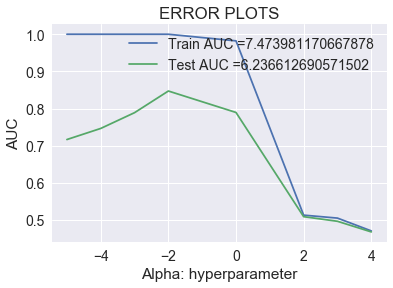

In [50]:
train_auc = []
cv_auc = []

train_auc = []
test_auc = []
alpha = [10**-5, 10**-4, 10**-3, 10**-2, 10**0, 10**2, 10**3, 10**4]
for i in alpha:
    nb = MultinomialNB(i)
    nb.fit(X_train_bow, y_train)
   
    y_train_pred =  nb.predict_proba(X_train_bow)[:,1]
    y_test_pred =  nb.predict_proba(X_test_bow)[:,1]

    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    test_auc.append(roc_auc_score(y_test, y_test_pred))

plt.plot(np.log10(alpha), train_auc, label="Train AUC ="+str(auc(np.log10(alpha), train_auc)))
plt.plot(np.log10(alpha), test_auc, label="Test AUC =" +str(auc(np.log10(alpha), test_auc)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

<h2> Confusion Matrix </h2>

<h2> Train Data </h2> 

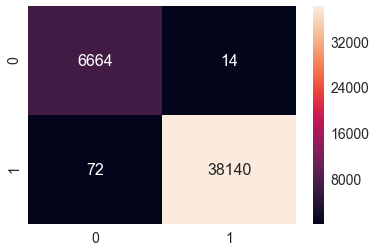

In [46]:
#https://github.com/cyanamous/Amazon-Food-Reviews-Analysis-and-Modelling/blob/master/2%20Amazon%20Food%20Re20KNNviews%20-%%20.ipynb
import seaborn as sns
nb = MultinomialNB(alpha=0.01)
nb.fit(X_train_bow, y_train)
y_pred = nb.predict(X_train_bow)
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h2> Test Data </h2>

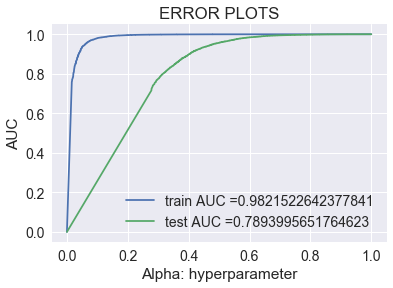

In [47]:
from sklearn.metrics import roc_curve, auc
best_alpha = 1
nb = MultinomialNB(best_alpha)
nb.fit(X_train_bow, y_train)

train_fpr, train_tpr, thresholds = roc_curve(y_train, nb.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test_bow)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

<h2> Confusion Matrix </h2>

<h2> Test Data </h2>

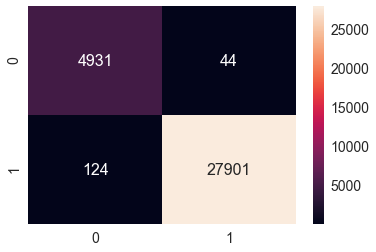

In [48]:

nb = MultinomialNB(alpha=0.01)
nb.fit(X_test_bow, y_test)
y_pred = nb.predict(X_test_bow)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h2> Features Importance </h2>

In [53]:
clf.feature_log_prob_
pos_class_prob_sorted = clf.feature_log_prob_[1, :].argsort()
pos_class_prob_sorted = pos_class_prob_sorted[::-1]
pos_class_prob_sorted[:10]
print("Positive Class (Top  Features Importance)")
print(np.take(vectorizer.get_feature_names(), pos_class_prob_sorted[:10]))
neg_class_prob_sorted = clf.feature_log_prob_[0, :].argsort()
neg_class_prob_sorted = neg_class_prob_sorted[::-1]
neg_class_prob_sorted = neg_class_prob_sorted[:10]
print("Negative Class (Top  Features Importance)")
print(np.take(vectorizer.get_feature_names(), neg_class_prob_sorted[:10]))

Positive Class (Top  Features Importance)
['the' 'and' 'it' 'to' 'of' 'is' 'br' 'this' 'for' 'in']
Negative Class (Top  Features Importance)
['the' 'and' 'it' 'to' 'of' 'this' 'br' 'is' 'in' 'that']


<h2> Feature Engineering </h2> 

In [54]:
from sklearn import preprocessing

bi_gram = CountVectorizer(ngram_range=(1,2)) 
X_train_fe = bi_gram.fit_transform(X_train)

print("Train Data Size: ",X_train_fe.shape)
X_test_fe = bi_gram.transform(X_test)

print("Test Data Size: ",X_test_fe.shape)

Train Data Size:  (44890, 719446)
Test Data Size:  (33000, 719446)


##  TF-IDF

In [55]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(x, y, test_size=0.33) 
X_train_1, X_cv_1, y_train_1, y_cv_1 = train_test_split(X_train_1, y_train_1, test_size=0.33) 


print(X_train_1.shape, y_train_1.shape)
print(X_cv_1.shape, y_cv_1.shape)
print(X_test_1.shape, y_test_1.shape)

print("="*100)

vectorizer_1 =  TfidfVectorizer(ngram_range=(1,2))
vectorizer_1.fit(X_train_1) 

X_train_tfidf = vectorizer_1.transform(X_train_1)
X_cv_tfidf = vectorizer_1.transform(X_cv_1)
X_test_tfidf = vectorizer_1.transform(X_test_1)

print("After vectorizations")
print(X_train_tfidf.shape, y_train_1.shape)
print(X_cv_tfidf.shape, y_cv_1.shape)
print(X_test_tfidf.shape, y_test_1.shape)
print("="*100)

(44890,) (44890,)
(22110,) (22110,)
(33000,) (33000,)
After vectorizations
(44890, 716894) (44890,)
(22110, 716894) (22110,)
(33000, 716894) (33000,)


<h2> Applying Mutlinomial Naive Bayes </h2> 

In [64]:
#https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train_1)
MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
pred_1 = clf.predict(X_train_tfidf)
print(pred_1)
print(clf.predict_log_proba(X_train_tfidf)[0:10])

[1 1 1 ... 1 1 1]
[[-7.19946304e+00 -7.47265933e-04]
 [-1.32824667e+01 -1.70411303e-06]
 [-1.09007112e+01 -1.84452807e-05]
 [-8.45852839e+00 -2.12106439e-04]
 [-8.96417264e+00 -1.27919592e-04]
 [-1.10239873e+01 -1.63059718e-05]
 [-8.63640193e+00 -1.77540259e-04]
 [-9.03546851e+00 -1.19116452e-04]
 [-1.18930576e+01 -6.83773381e-06]
 [-9.14439769e+00 -1.06822254e-04]]


In [65]:
clf.feature_log_prob_

array([[-11.33676018, -13.5722149 , -13.5722149 , ..., -13.5722149 ,
        -13.5722149 , -13.5722149 ],
       [-10.73796447, -13.82796741, -13.73703353, ..., -13.71614075,
        -13.72875568, -13.72875568]])

<h2> Hyper Parameter Tuning (Best Alpha) </h2>

In [58]:
clf = MultinomialNB()
param_grid = {'alpha':[10**-5, 10**-4, 10**-3, 10**-2, 10**0, 10**2, 10**3, 10**4]} 
gsv = GridSearchCV(clf,param_grid,verbose=1)
gsv.fit(X_train_tfidf,y_train_1)
print("Best HyperParameter: ",gsv.best_params_)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:   21.9s finished


Best HyperParameter:  {'alpha': 0.001}


<h2> ROC_AUC </h2>

In [59]:
roc_auc = roc_auc_score(y_train, pred_1)
print(roc_auc)

0.5


<h2> Performance Of Model </h2>

<h2> Train Data </h2>

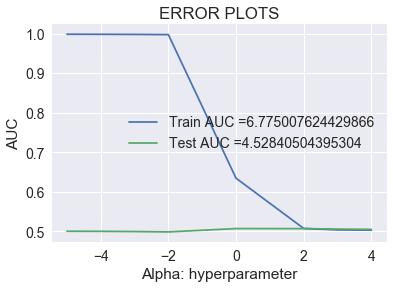

In [60]:
train_auc = []
cv_auc = []

train_auc = []
test_auc = []
alpha = [10**-5, 10**-4, 10**-3, 10**-2, 10**0, 10**2, 10**3, 10**4]
for i in alpha:
    nb = MultinomialNB(i)
    nb.fit(X_train_tfidf, y_train)
   
    y_train_pred =  nb.predict_proba(X_train_tfidf)[:,1]
    y_test_pred =  nb.predict_proba(X_test_tfidf)[:,1]

    
    train_auc.append(roc_auc_score(y_train,y_train_pred))
    test_auc.append(roc_auc_score(y_test, y_test_pred))

plt.plot(np.log10(alpha), train_auc, label="Train AUC ="+str(auc(np.log10(alpha), train_auc)))
plt.plot(np.log10(alpha), test_auc, label="Test AUC =" +str(auc(np.log10(alpha), test_auc)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

<h2> Confusion Matrix </h2>

<h2> Train Data </h2>

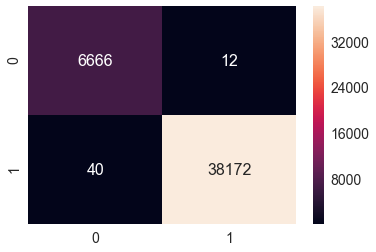

In [61]:
#https://github.com/cyanamous/Amazon-Food-Reviews-Analysis-and-Modelling/blob/master/2%20Amazon%20Food%20Re20KNNviews%20-%%20.ipynb
nb = MultinomialNB(alpha=0.001)
nb.fit(X_train_bow, y_train)
y_pred = nb.predict(X_train_bow)
cm = pd.DataFrame(confusion_matrix(y_train, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h2> Test Data </h2>

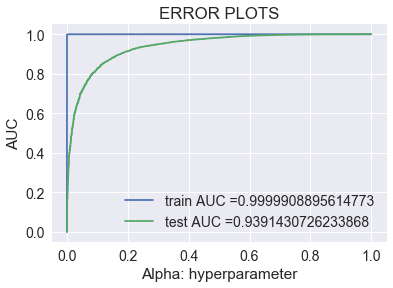

In [62]:
from sklearn.metrics import roc_curve, auc
best_alpha = 0.01
nb = MultinomialNB(best_alpha)
nb.fit(X_train_tfidf, y_train_1)

train_fpr, train_tpr, thresholds = roc_curve(y_train_1, nb.predict_proba(X_train_tfidf)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test_1, nb.predict_proba(X_test_tfidf)[:,1])

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("Alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.show()

<h2> Confusion Matrix </h2>

<h2> Test Data </h2>

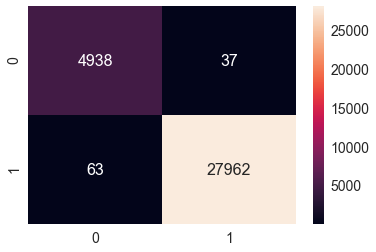

In [63]:
#https://github.com/cyanamous/Amazon-Food-Reviews-Analysis-and-Modelling/blob/master/2%20Amazon%20Food%20Re20KNNviews%20-%%20.ipynb

nb = MultinomialNB(alpha=0.001)
nb.fit(X_test_bow, y_test)
y_pred = nb.predict(X_test_bow)
cm = pd.DataFrame(confusion_matrix(y_test, y_pred), range(2),range(2))
sns.set(font_scale=1.4)
sns.heatmap(cm, annot=True,annot_kws={"size": 16}, fmt='g')

<h2> Features Importance </h2>

In [66]:
clf.feature_log_prob_
pos_class_prob_sorted = clf.feature_log_prob_[1, :].argsort()
pos_class_prob_sorted = pos_class_prob_sorted[::-1]
pos_class_prob_sorted[:10]
print("Positive Class (Top  Features Importance)")
print(np.take(vectorizer_1.get_feature_names(), pos_class_prob_sorted[:10]))
neg_class_prob_sorted = clf.feature_log_prob_[0, :].argsort()
neg_class_prob_sorted = neg_class_prob_sorted[::-1]
neg_class_prob_sorted = neg_class_prob_sorted[:10]
print("Negative Class (Top  Features Importance)")
print(np.take(vectorizer_1.get_feature_names(), neg_class_prob_sorted[:10]))

Positive Class (Top  Features Importance)
['the' 'and' 'it' 'to' 'is' 'br' 'of' 'this' 'for' 'in']
Negative Class (Top  Features Importance)
['the' 'it' 'and' 'to' 'br' 'of' 'this' 'not' 'was' 'is']


<h2> Feature Engineering </h2>

In [67]:
from sklearn import preprocessing
bi_gram = TfidfVectorizer(ngram_range=(1,2)) 
X_train_fe = bi_gram.fit_transform(X_train)
print("Train Data Size: ",X_train_fe.shape)

X_test_fe = bi_gram.transform(X_test)
print("Test Data Size: ",X_test_fe.shape)

Train Data Size:  (44890, 719446)
Test Data Size:  (33000, 719446)


<h2> Conclusion Table </h2>

In [69]:
from prettytable import PrettyTable
 
x = PrettyTable()

x.field_names = ["Set", "Vectorizer", "Model 1", "Hyper Parameter(Best_Alpha)", "Train_AUC", "Test_AUC", "ROC_AUC"]

x.add_row(["Set:-1", "BOW", "Multinomial_Naive_bayes", 1, 7.48, 0.97, 0.87])
x.add_row(["Set:-2", "TFIDF", "Multinomial_Naive", 0.01, 6.76, 0.94, 0.50])
print(x)

+--------+------------+-------------------------+-----------------------------+-----------+----------+---------+
|  Set   | Vectorizer |         Model 1         | Hyper Parameter(Best_Alpha) | Train_AUC | Test_AUC | ROC_AUC |
+--------+------------+-------------------------+-----------------------------+-----------+----------+---------+
| Set:-1 |    BOW     | Multinomial_Naive_bayes |              1              |    7.48   |   0.97   |   0.87  |
| Set:-2 |   TFIDF    |    Multinomial_Naive    |             0.01            |    6.76   |   0.94   |   0.5   |
+--------+------------+-------------------------+-----------------------------+-----------+----------+---------+


# Conclusion:-

1. I loaded a amazon fine  food reviews and after that i change score in 0 and 1 where 1 represent positive reviews and  0      represent negative reviews.
2. Then i split whole datapoints into 3parts Train Data , TestData And Cross-validation data.
3. Then i used this splited datapoint for featurization BOW, TF_IDF, W2Vec , AvgW2Vec featurization .
4. Then i used only Train data to avoid dataleakage. and i applied naive bayes in train data 
5. Then i find Hyper Parameter Tuning where i found best Hyper Parameter tuning, best Accurancy through GridSerch cross-validation.
6. Then i find feature Importance in naive bayes classification where i found top 10 positive and nagative features names in it.
7. Then i ploted Performance of model in train data and test and cross-validation data using naive bayes classification.
8. Then i caculate confusion matrix where i try to find how many data points are actually positive and negative and how many are predicated datapoint in it.
9. Then  i created Conclusion table using pretty table for 4 featurization where i show the values of best hyper parameter, train_AUC, Test_AUC values in table for all 4 featurization.

<h2>=========================================================================== 